## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df=pd.read_csv("ab_data.csv")
df.head(5)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
#showing info of rows in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


c. The number of unique users in the dataset.

In [4]:
#number of unique users in the dataset
df.user_id.nunique()

290584

d. The proportion of users converted.

In [5]:
#get the mean of the converted row
df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
#get number of times where new_page and treatment don't meet
count = df.query("group == 'treatment' and landing_page == 'old_page'").shape[0] + df.query("group == 'control' and landing_page == 'new_page'").shape[0]

In [7]:
print("Number of times the new_page and treatment don't line up =",count)

Number of times the new_page and treatment don't line up = 3893


f. Do any of the rows have missing values?

In [8]:
#number of missing values
sum(pd.isnull(df).any())
#we could use another way with "df.info"


0

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
#get the treatment and the new_page 
trt_new = df.query("group == 'treatment' and landing_page == 'new_page'")
#get the control and the old_page 
ctrl_old = df.query("group == 'control' and landing_page == 'old_page'")
#put them in df2
df2 = trt_new.append(ctrl_old, ignore_index = True)

In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

In [11]:
#see the first rows of df2 and explore it
df2.head(4)

,user_id,timestamp,group,landing_page,converted
0,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
1,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
2,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
3,817355,2017-01-04 17:58:08.979471,treatment,new_page,1


a. How many unique **user_id**s are in **df2**?

In [12]:
#number of unique users in df2
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [13]:
#get the repeated id
df2[df2["user_id"].duplicated()]

,user_id,timestamp,group,landing_page,converted
1404,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [14]:
#get the rows of the repeated id
df2[df2["user_id"].duplicated(keep=False)]

,user_id,timestamp,group,landing_page,converted
938,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
1404,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [15]:
print("frame dimensions before = " , df2.shape)

frame dimensions before =  (290585, 5)


In [16]:
#modify df2 with the 
df2 = df2.drop(df2[df2.duplicated(subset = ["user_id"])].index)

In [17]:
print("frame dimensions after = " , df2.shape)
print("=================To see that every thing working well=====================")
df2.info()

frame dimensions after =  (290584, 5)
=================To see that every thing working well=====================
<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 290584
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       290584 non-null  int64 
 1   timestamp     290584 non-null  object
 2   group         290584 non-null  object
 3   landing_page  290584 non-null  object
 4   converted     290584 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [18]:
print("The probability of an individual converting regardless of the page they receive ",df.converted.mean())

The probability of an individual converting regardless of the page they receive  0.11965919355605512


b. Given that an individual was in the `control` group, what is the probability they converted?

In [19]:
print("The probability of converting control group ",df2.query("group == 'control'")["converted"].mean())

The probability of converting control group  0.1203863045004612


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [20]:
print("The probability of converting treatment group ",df2.query("group == 'treatment'")["converted"].mean())

The probability of converting treatment group  0.11880806551510564


d. What is the probability that an individual received the new page?

In [21]:
#probability of individual recieved the new page 
print("The probability of individual recieved the new page : ",df2["landing_page"].value_counts() / df2.shape[0])

The probability of individual recieved the new page :  new_page    0.500062
old_page    0.499938
Name: landing_page, dtype: float64


e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**My answer**
- As we found result of an individual in the treatment group , the probability which was converted to is 0.11965919355605512
- and for the control group , we found that the probability which was converted to is 0.11880806551510564
- so as we notice it goes down from old as 0.1196 and new as 0.1188

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**
$$H_0: p_{new} \leq p_{old}$$
$$ H_0: p_{new} - p_{old} \leq 0 $$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [22]:
Pnew = df2.converted.mean()
print("The conversion rate for  𝑝𝑛𝑒𝑤  under the null= ", Pnew)

The conversion rate for  𝑝𝑛𝑒𝑤  under the null=  0.11959708724499628


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [23]:
Pold = df2.converted.mean()
print("The conversion rate for  𝑝𝑛𝑒𝑤  under the null= ", Pold)

The conversion rate for  𝑝𝑛𝑒𝑤  under the null=  0.11959708724499628


c. What is $n_{new}$?

In [24]:
N_new = df2.query("group == 'treatment'")["user_id"].nunique()
print("The number of N𝑛𝑒𝑤 ",N_new)

The number of N𝑛𝑒𝑤  145310


d. What is $n_{old}$?

In [25]:
N_old = df2.query("group == 'control'")["user_id"].nunique()
print("The number of N𝑜𝑙𝑑 ",N_old)

The number of N𝑜𝑙𝑑  145274


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [26]:
#Simulate 𝑛𝑛𝑒𝑤 transactions with a convert rate of 𝑝𝑛𝑒𝑤 under the null.Store these 𝑛𝑛𝑒𝑤 1's and 0's in new_page_converted
new_page_converted = np.random.choice([1,0], size = N_new, replace = True, p = (Pnew, 1-Pnew))
print("𝑛𝑛𝑒𝑤  transactions with a convert rate of 𝑝𝑛𝑒𝑤 under the null")
new_page_converted

𝑛𝑛𝑒𝑤  transactions with a convert rate of 𝑝𝑛𝑒𝑤 under the null


array([0, 0, 0, ..., 0, 0, 0])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [27]:
#Simulate 𝑛𝑜𝑙𝑑 transactions with a convert rate of 𝑝𝑜𝑙𝑑 under the null.Store these 𝑛𝑜𝑙𝑑 1's and 0's in old_page_converted
old_page_converted = np.random.choice([1,0], size = N_old, replace = True, p = [Pold, (1-Pold)])
print("𝑛𝑜𝑙𝑑  transactions with a convert rate of 𝑝𝑜𝑙𝑑 under the null")
old_page_converted

𝑛𝑜𝑙𝑑  transactions with a convert rate of 𝑝𝑜𝑙𝑑 under the null


array([0, 0, 0, ..., 0, 0, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [28]:
print("𝑝𝑛𝑒𝑤 - 𝑝𝑜𝑙𝑑 for simulated value : ",new_page_converted.mean() - old_page_converted.mean())

𝑝𝑛𝑒𝑤 - 𝑝𝑜𝑙𝑑 for simulated value :  -0.0006972288910764152


h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [29]:
#making sampling distribution with Simulating 10,000  𝑝𝑛𝑒𝑤  -  𝑝𝑜𝑙𝑑  values
#p_diffs = []
#for i in range(10000):
#    new_page_converted = np.random.choice([1,0], size = N_new, replace = True, p = (Pnew, 1-Pnew))
#    old_page_converted = np.random.choice([1,0], size = N_old, replace = True, p = (Pold, 1-Pold))
#    difference = new_page_converted.mean() - old_page_converted.mean()
#    p_diffs.append(difference)
    

p_diffs = []
new_converted_simulation = np.random.binomial(N_new, Pnew, 10000)/N_new
old_converted_simulation = np.random.binomial(N_old, Pold, 10000)/N_old
p_diffs = new_converted_simulation - old_converted_simulation

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

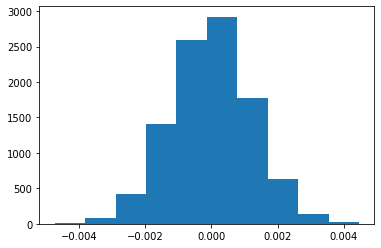

In [30]:
#Plot a histogram of the p_diffs using matplotlib.hist function
p_diffs = np.array(p_diffs)
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [31]:
#calculating the actuall difference 
p_diffs = np.array(p_diffs)
act_diff = df2.query("group == 'treatment'").converted.mean() - df2.query("group == 'control'").converted.mean()
print("calculated actual difference = ",act_diff)
print("===========================================================")
nullvals = np.random.normal(0, p_diffs.std(), p_diffs.size)
print("proportion calculated : ",(nullvals > act_diff).mean())

calculated actual difference =  -0.0015782389853555567
proportion calculated :  0.9038


k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**My answer**
- As we do the calculations of p-value = 0.90 , we found that the change in the conversion rate between the new page and the 
- old page doesn't seem to be asegnificant change, so we find that we fail to reject the null hypothesis between the old page and the new page



l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [32]:
import statsmodels.api as sm

convert_old = sum(df2.query("group == 'control'").converted)
convert_new = sum(df2.query("group == 'treatment'").converted)
n_old = df2.query("landing_page == 'old_page'").count()[0]
n_new = df2.query("landing_page == 'new_page'").count()[0]

In [33]:
print("old page conversion: ",convert_old)
print("new page conversion: ",convert_new)
print("number of rows associated with the old page: ",n_old)
print("number of rows associated with the new page: ",n_new)

old page conversion:  17489
new page conversion:  17264
number of rows associated with the old page:  145274
number of rows associated with the new page:  145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [34]:
#==============calculating z_score==============
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
print("Z_score : ",z_score)
print("P_value : ",p_value)

Z_score :  1.3109241984234394
P_value :  0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**My answer**
- As we that p-value is 0.9 and we caculated the Z_score is 1.3 which aim to the we fail to reject the null hypothesis based on the Z_score
- and in both J and K parts , we came to same conclusion as mentioned 


<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**My answer**
- So , we will use **logistic regression**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [35]:
#add the intercept column
df2['intercept'] = 1
#create a dummy variable column for which page each user received
df2[['control', 'treatment']] = pd.get_dummies(df2['group'])

#add ab_page column, which is 1 when an individual receives the treatment and 0 if control.
df2['ab_page'] = pd.get_dummies(df['group'])['treatment']

df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,control,treatment,ab_page
0,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,0
1,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,0
2,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,0,1,1
3,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,0,1,1
4,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,0,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [36]:
#importing regression model from statsmodels
logit_reg_mod = sm.Logit(df2['converted'], df2[['intercept', 'treatment']])

In [37]:
#fitting the regression model 
model_results = logit_reg_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [38]:
model_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Fri, 14 Aug 2020   Pseudo R-squ.:               8.077e-06
Time:                        20:54:15   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
treatment     -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

$$H_0: p_{new} - p_{old} = 0$$
$$H_1: p_{new} - p_{old} \neq 0$$

**My answer**
- The P-value associated with the ab_page is 0.190
- In the current , the null hypothesis associated here because there is no difference between the treatment and control group the p-value related here with the treatment page is not the same as part|| as hypothesis test is explained defferently but here we are asking if there is a change in the conversion rate between the old page and the new page 

**=========================================================================================================================**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**My answer**
- from disadvatages when we add other variables idependent of other itams in the dataset so the more items we add the more it will make the model more sophisticated and long time to train.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

### Joining the two datasets of countries and main dataset together

In [39]:
countries_df = pd.read_csv('countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,control,treatment,ab_page
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1,0


In [40]:
### Create the necessary dummy variables
df_new[['CA', 'UK', 'US']] = pd.get_dummies(df_new['country'])
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,control,treatment,ab_page,CA,UK,US
user_id,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1,0,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1,0,0,1,0


### Adding logistic regression model and summary

In [41]:
#making the the intercept column
df_new['intercept'] = 1
#add the model and fit it and get summary results
logitmod = sm.Logit(df_new['converted'], df_new[['intercept', 'UK', 'US']])
results = logitmod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Fri, 14 Aug 2020   Pseudo R-squ.:               1.521e-05
Time:                        20:54:18   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
UK             0.0507      0.028      1.786      0.074      -0.005       0.106
US             0.0408      0.027      1.518      0.129      -0.012       0.093
==============================================================================
"""

In [42]:
### Fit Your Linear Model And Obtain the Results
logitmod_third = sm.Logit(df_new['converted'], df_new[['intercept', 'treatment', 'UK', 'US']])
## adding 3 items logit model
results2 = logitmod_third.fit()
results2.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Fri, 14 Aug 2020   Pseudo R-squ.:               2.323e-05
Time:                        20:54:20   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
treatment     -0.0149      0.011     -1.307      0.191      -0.037       0.007
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
US             0.0408      0.027      1.516      0.130      -0.012       0.093
==============================================================================
"""

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

**Another Logistic Regression model with ab_page**

In [43]:
df_new['ab_UK'] = df_new['ab_page'] * df_new['UK']
df_new['ab_US'] = df_new['ab_page'] * df_new['US']
lm3 = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'ab_UK', 'ab_US']])
results = lm3.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366110
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Fri, 14 Aug 2020   Pseudo R-squ.:               3.019e-05
Time:                        20:54:23   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                   0.09271
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9951      0.008   -246.852      0.000      -2.011      -1.979
ab_page       -0.0439      0.038     -1.168      0.243      -0.117       0.030
ab_UK          0.0745      0.040      1.864      0.062      -0.004       0.153
ab_US          0.0325      0.038      0.858      0.391      -0.042       0.107
==============================================================================
"""

**Conclusions on logit model with ab_page**
- the p_value has become less than the two modules so the performance of the old page is more effective than new page which don't have significant change

<a id='conclusions'></a>
## Conclusions

**From the previous analysis** 
- As we found that the preformance of the of old page was slightly better (by very small values only) where we achieve it before 
- so we don't have to put all the power in developing new page 
- or searching for an atractive way to make the page more effective for visits


### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.